In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from tensorflow.keras.datasets import cifar10

In [18]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

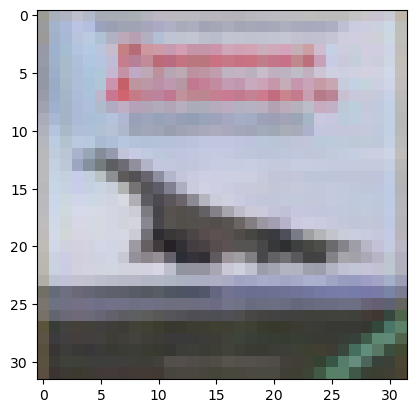

In [21]:
plt.imshow(x_test[3])

In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [26]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='valid',input_shape=[32,32,3],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [29]:
model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=10,callbacks=[early])

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8334 - accuracy: 0.3183 - val_loss: 1.6440 - val_accuracy: 0.4031
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5707 - accuracy: 0.4287 - val_loss: 1.5127 - val_accuracy: 0.4545
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4755 - accuracy: 0.4692 - val_loss: 1.4708 - val_accuracy: 0.4644
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4148 - accuracy: 0.4916 - val_loss: 1.4073 - val_accuracy: 0.4967
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3702 - accuracy: 0.5094 - val_loss: 1.4129 - val_accuracy: 0.5003
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3335 - accuracy: 0.5245 - val_loss: 1.3677 - val_accuracy: 0.5098
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3022 - accuracy: 0.5375 - val_loss: 1.3815 -

In [30]:
loss=pd.DataFrame(model.history.history)

<Axes: >

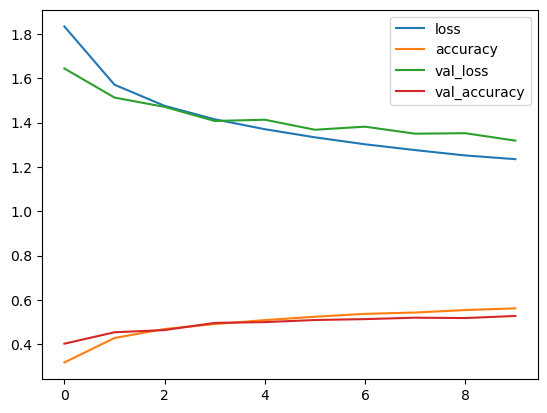

In [31]:
loss.plot()

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [34]:
pred=(model.predict(x_test)>0.5).astype('int32')

313/313 [==============================] - 1s 2ms/step


In [35]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [36]:
print(classification_report(y_test_cat.argmax(axis=1),pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.16      0.83      0.26      1000
           1       0.74      0.43      0.54      1000
           2       0.65      0.18      0.28      1000
           3       0.53      0.13      0.21      1000
           4       0.62      0.31      0.41      1000
           5       0.62      0.33      0.43      1000
           6       0.72      0.51      0.60      1000
           7       0.76      0.41      0.53      1000
           8       0.72      0.38      0.50      1000
           9       0.64      0.52      0.57      1000

    accuracy                           0.40     10000
   macro avg       0.61      0.40      0.43     10000
weighted avg       0.61      0.40      0.43     10000



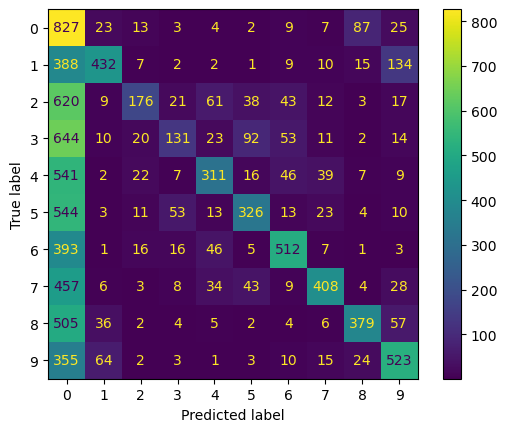

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test_cat.argmax(axis=1),pred.argmax(axis=1))